In [2]:
from utils import load_grades_data, load_heart_data, generate_silhoutte_score_plot, generate_kmeans_SV_ICD_plots, generate_distance_bw_gmms_plots, generate_bic_plot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import random_projection
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD
np.random.seed(5)

In [3]:
X, y = load_heart_data()

In [5]:
pca = PCA(n_components= 2).fit(X)
X_pca = pca.transform(X)

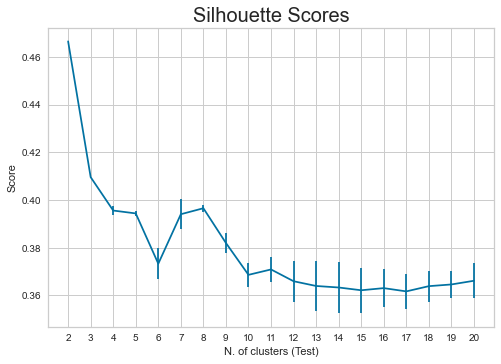

In [6]:
generate_silhoutte_score_plot(X_pca, 21, KMeans)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


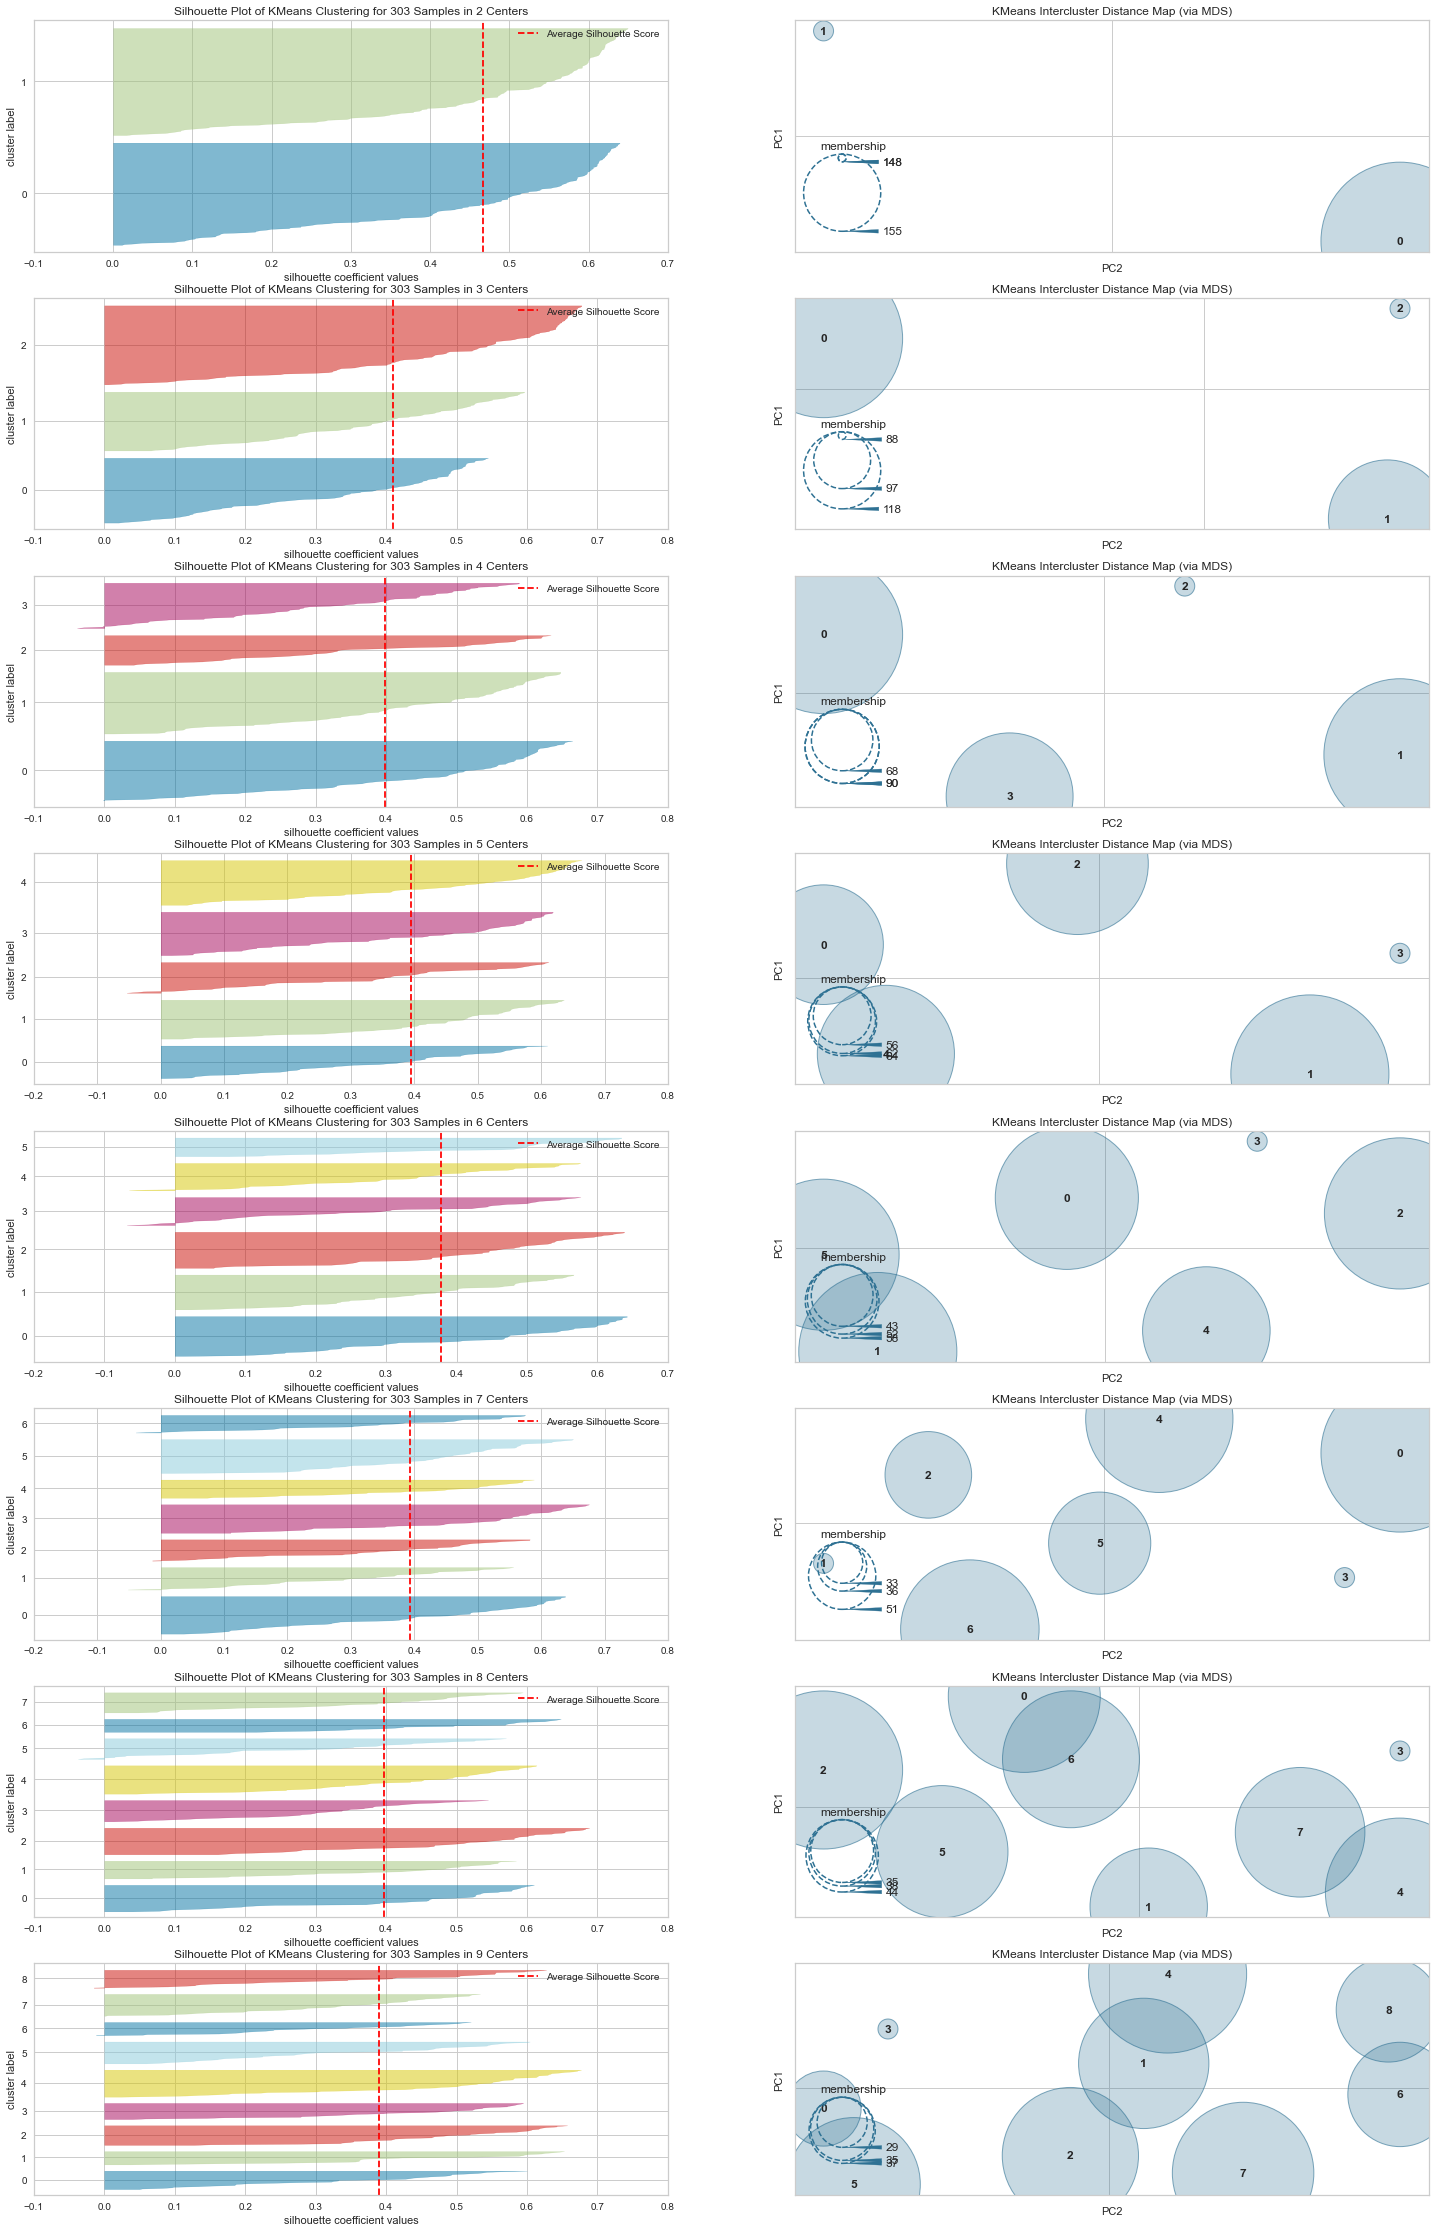

In [8]:
k = list(range(2,10))
generate_kmeans_SV_ICD_plots(X_pca, k)

In [10]:
# kmeans - ica

In [11]:
ica = FastICA(n_components= 2, max_iter=10000, tol=0.1).fit(X)
X_ica = ica.transform(X)

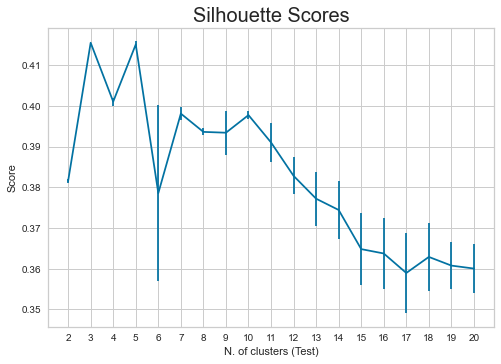

In [12]:
generate_silhoutte_score_plot(X_ica, 21, KMeans)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


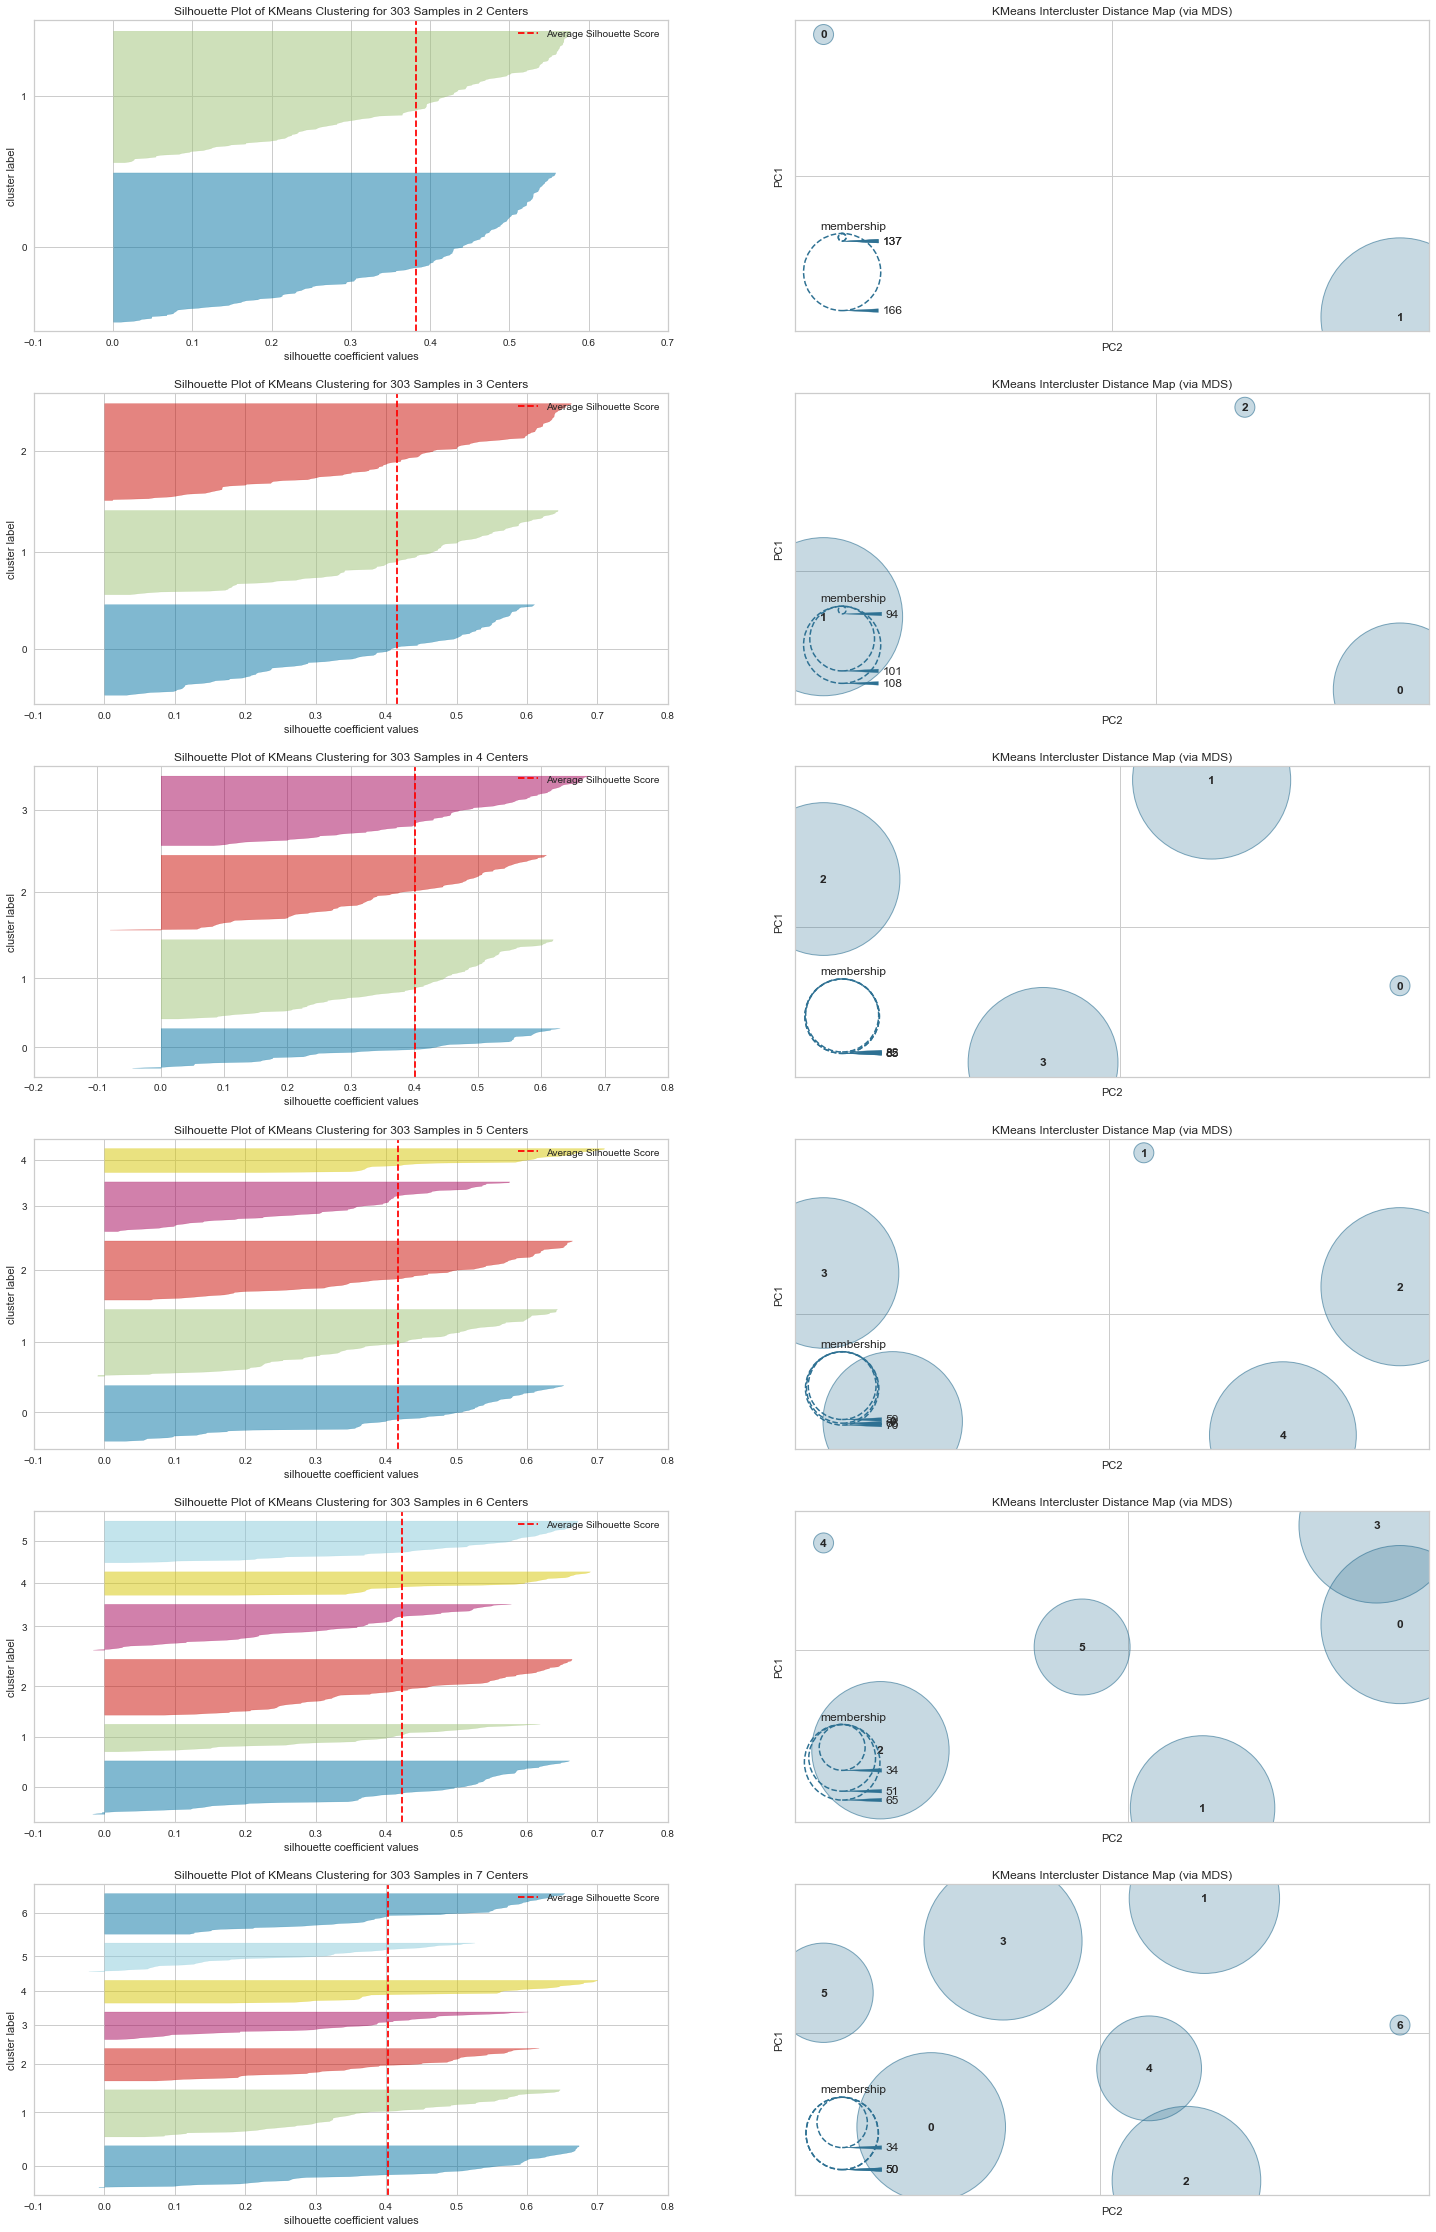

In [13]:
k = list(range(2,8))
generate_kmeans_SV_ICD_plots(X_ica, k)

In [15]:
rp = random_projection.SparseRandomProjection(n_components=15)
X_rp=rp.fit_transform(X)

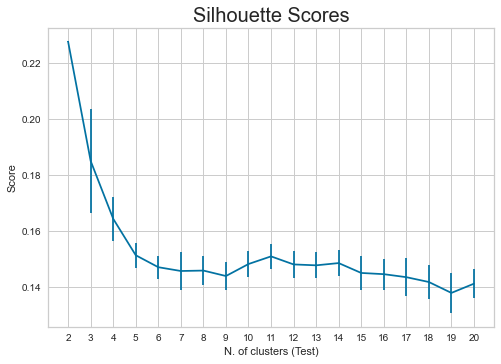

In [16]:
generate_silhoutte_score_plot(X_rp, 21, KMeans)

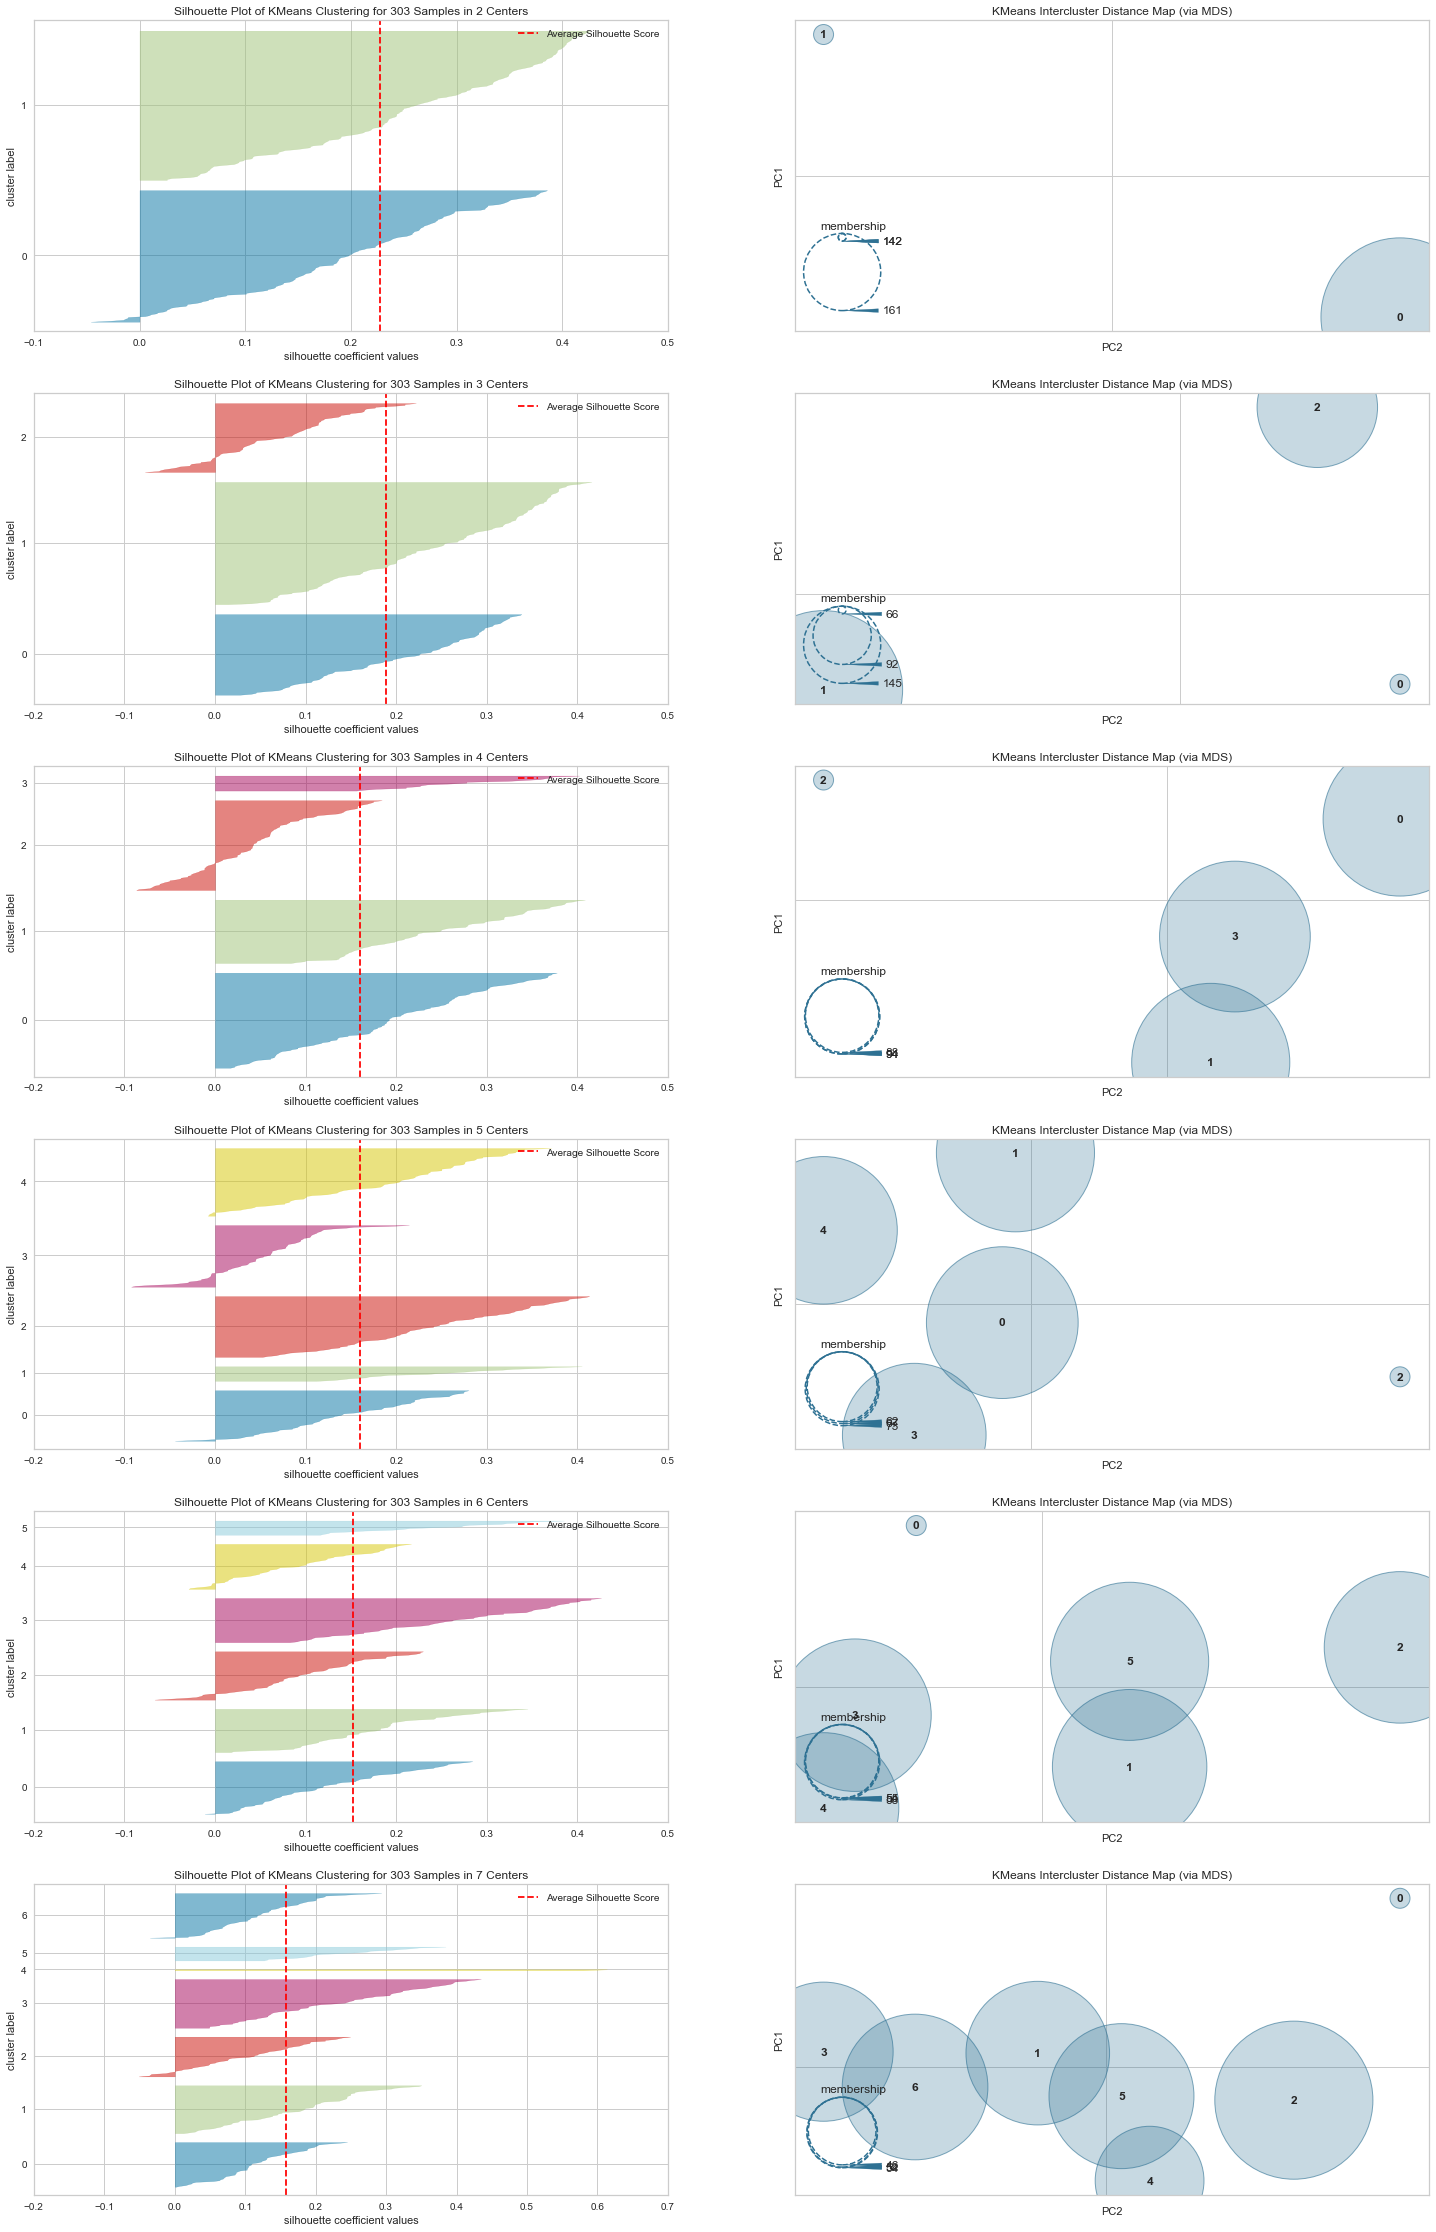

In [17]:
k = list(range(2,8))
generate_kmeans_SV_ICD_plots(X_rp, k)


In [18]:
#kmeans-svd

In [19]:
tsvd = TruncatedSVD(n_components=2)
X_tsvd = tsvd.fit_transform(X)


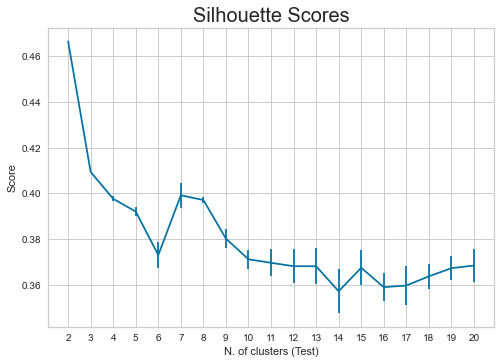

In [20]:
generate_silhoutte_score_plot(X_tsvd, 21, KMeans)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


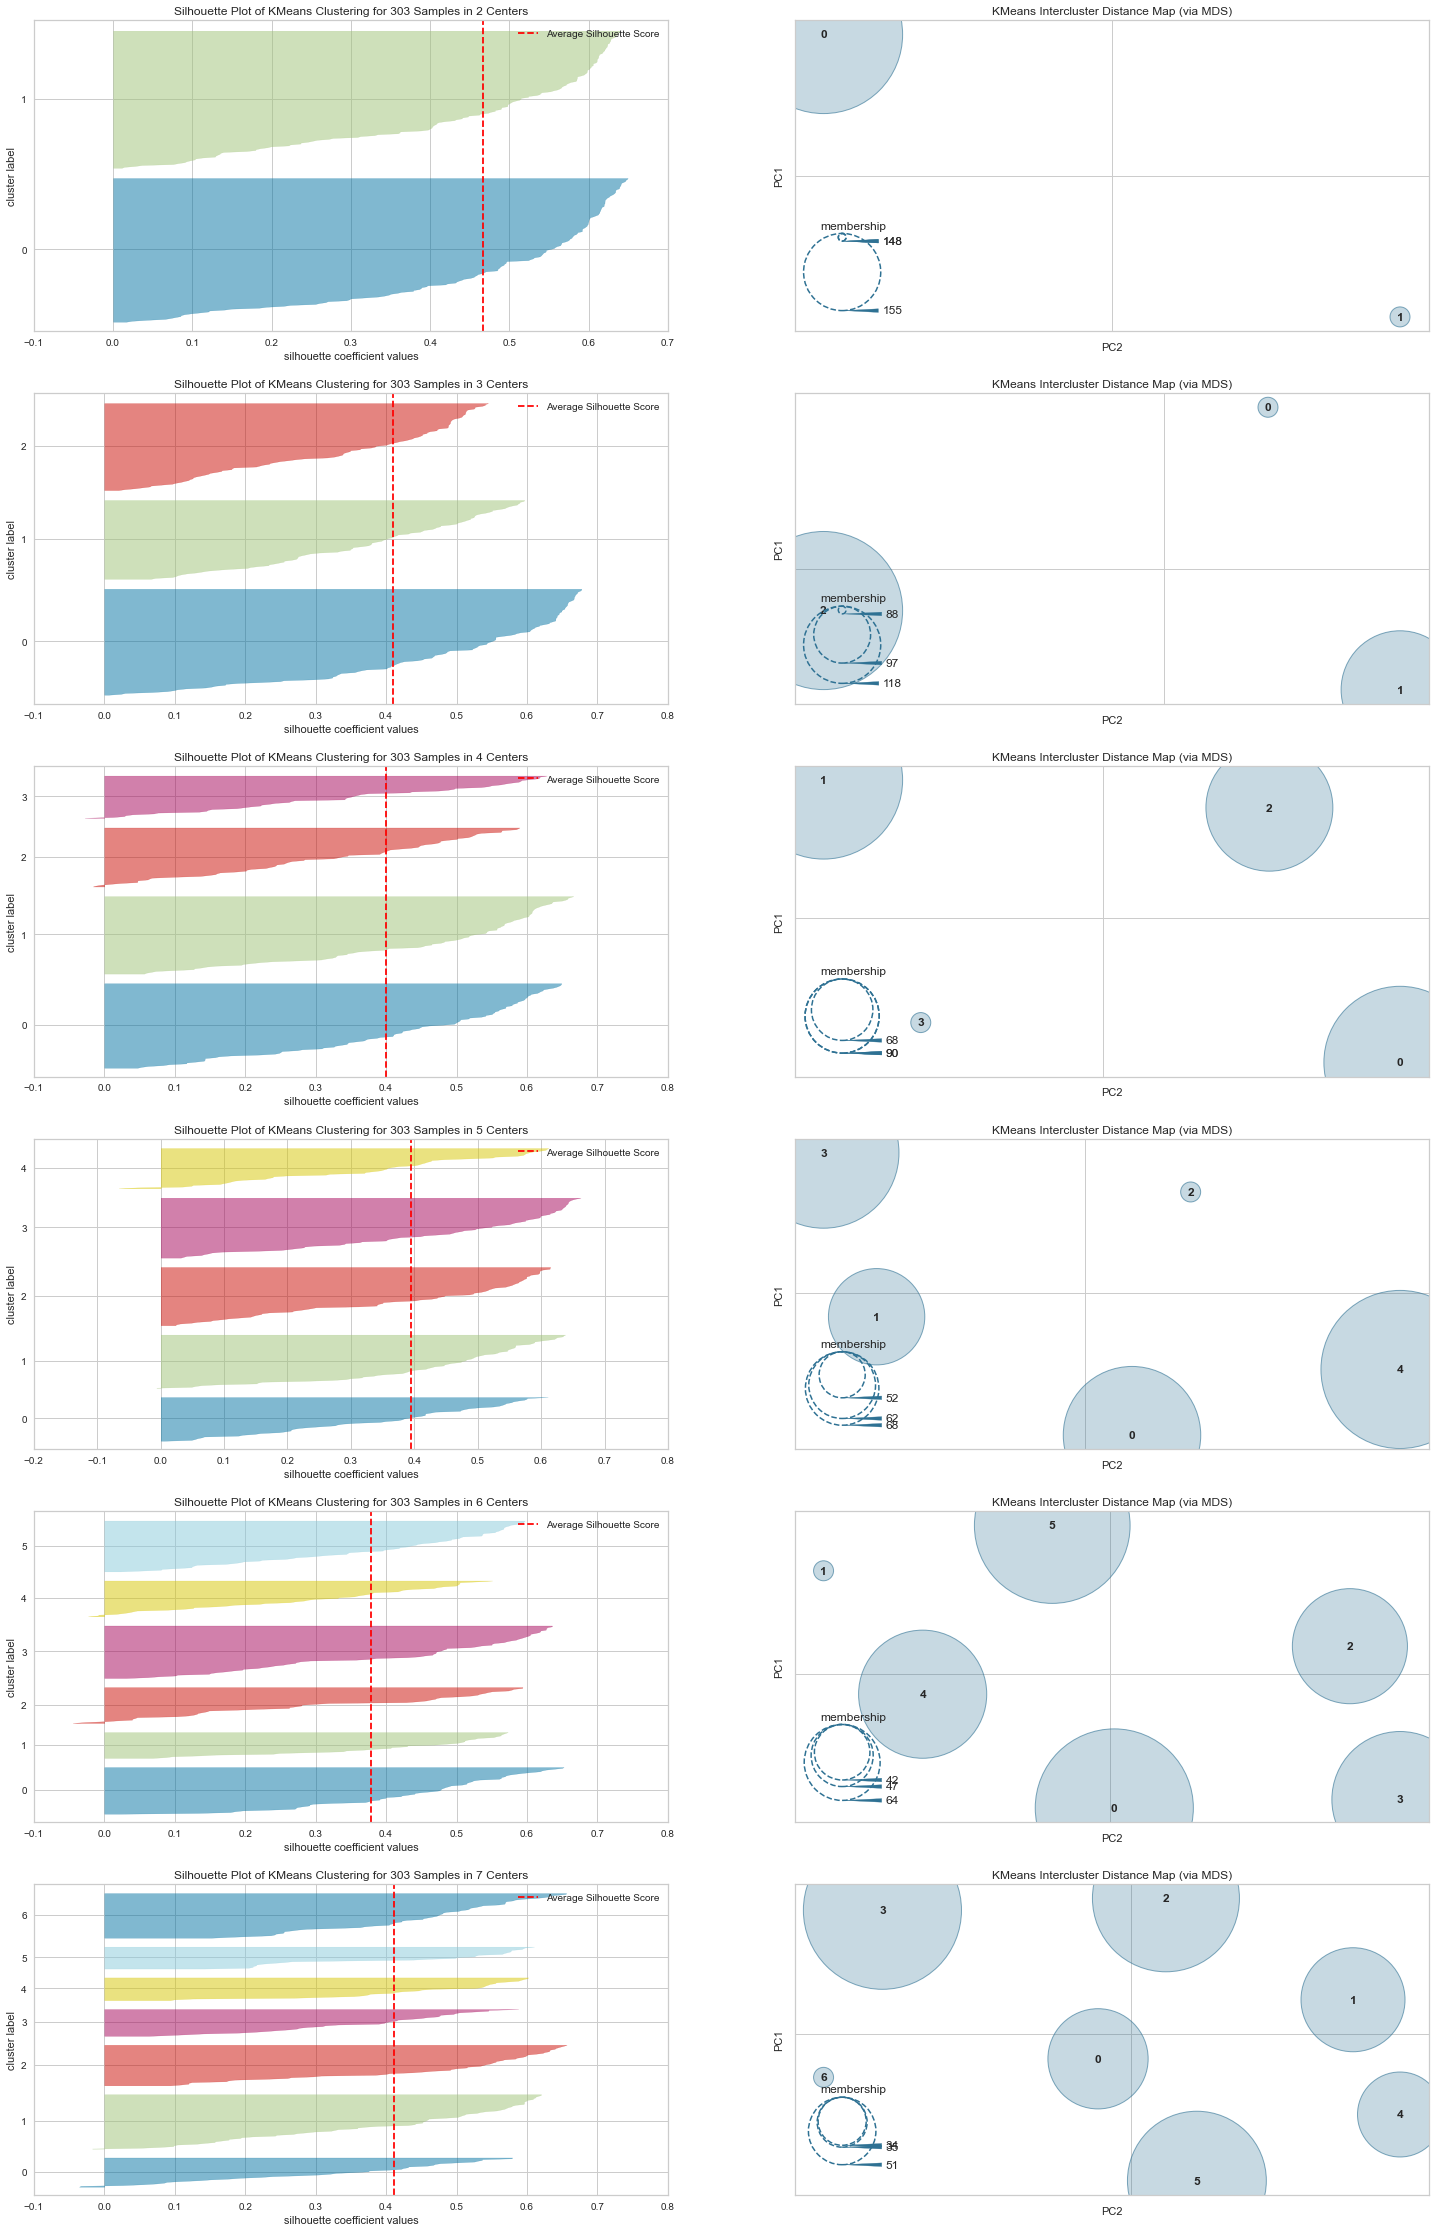

In [21]:
k = list(range(2,8))
generate_kmeans_SV_ICD_plots(X_pca, k)

In [22]:
# em - pca

In [23]:
pca = PCA(n_components= 2).fit(X)
X_pca = pca.transform(X)

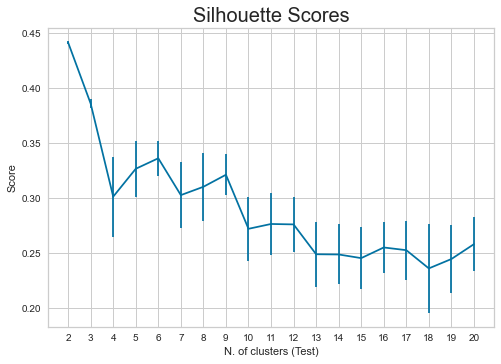

In [24]:
generate_silhoutte_score_plot(X_pca, 21, GaussianMixture)

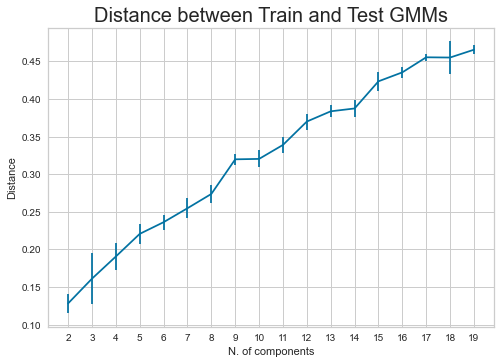

In [25]:
generate_distance_bw_gmms_plots(X_pca, 20)

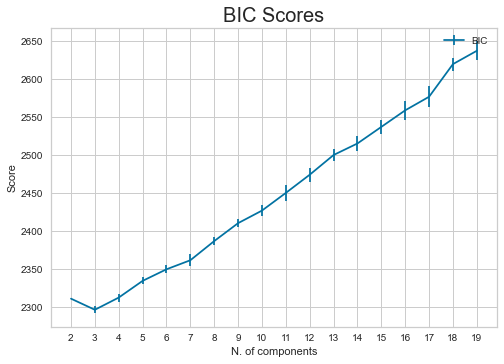

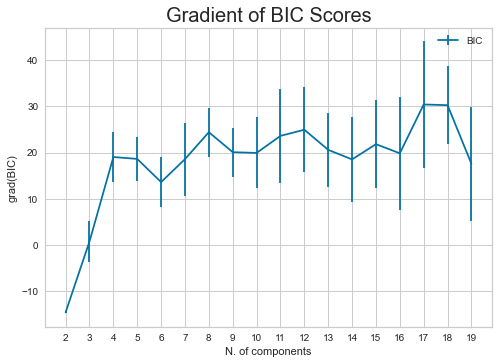

<Figure size 576x396 with 0 Axes>

In [26]:
generate_bic_plot(X_pca, 20)

In [27]:
# em-ica

In [28]:
ica = FastICA(n_components= 2, max_iter=10000, tol=0.1).fit(X)
X_ica = ica.transform(X)

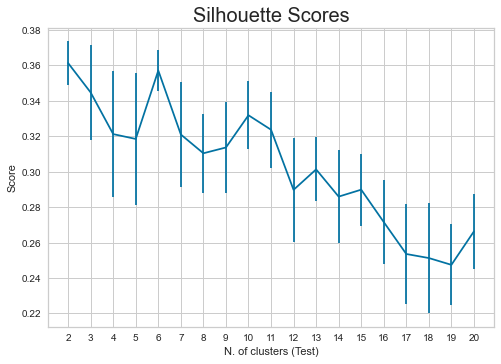

In [29]:
generate_silhoutte_score_plot(X_ica, 21, GaussianMixture)

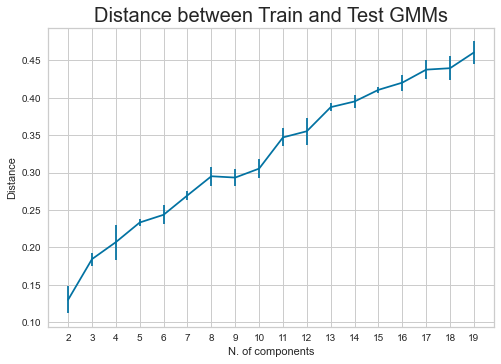

In [30]:
generate_distance_bw_gmms_plots(X_ica, 20)

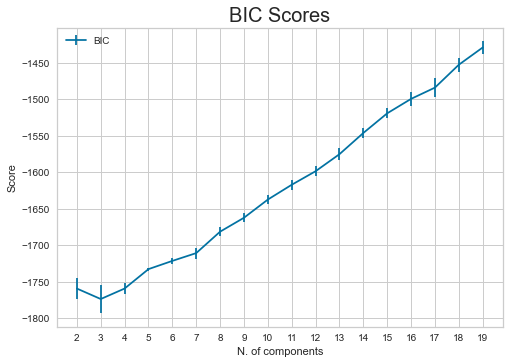

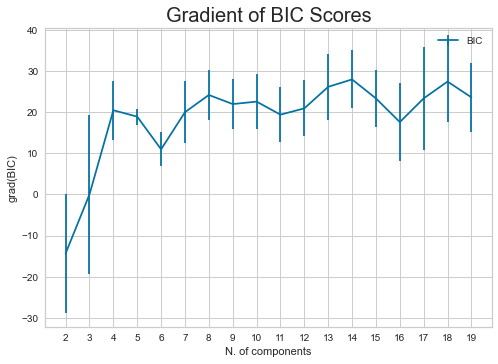

<Figure size 576x396 with 0 Axes>

In [31]:
generate_bic_plot(X_ica, 20)

In [32]:
#em-randomized-projection

In [34]:
rp = random_projection.SparseRandomProjection(n_components=15)
X_rp=rp.fit_transform(X)

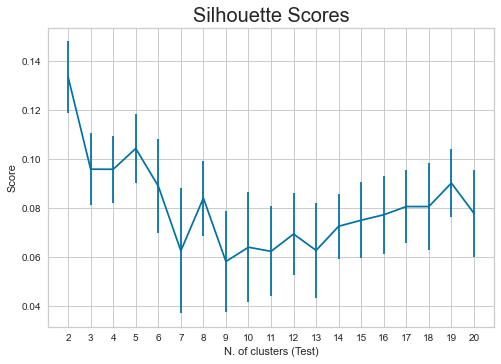

In [35]:
generate_silhoutte_score_plot(X_rp, 21, GaussianMixture)

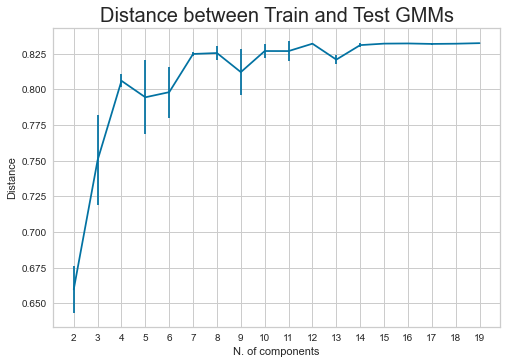

In [36]:
generate_distance_bw_gmms_plots(X_rp, 20)

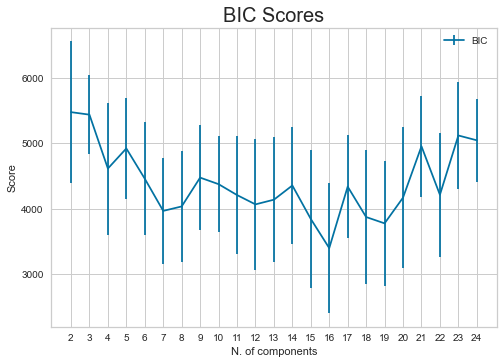

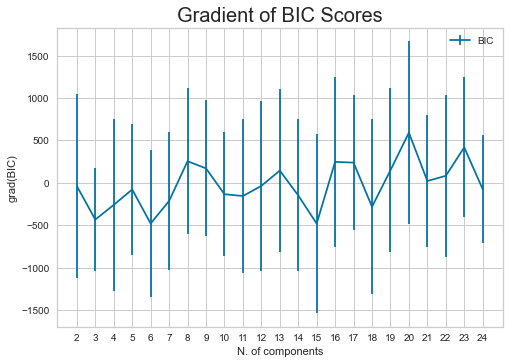

<Figure size 576x396 with 0 Axes>

In [37]:
generate_bic_plot(X_rp, 25)

In [38]:
#em-svd

In [39]:
tsvd = TruncatedSVD(n_components=2)
X_tsvd = tsvd.fit_transform(X)

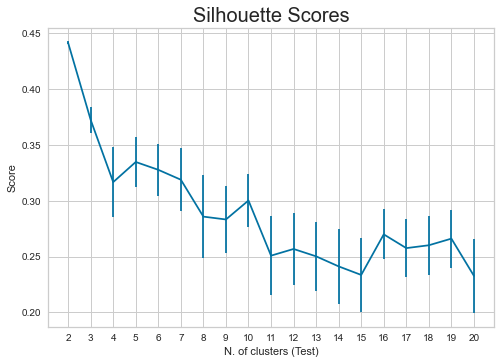

In [40]:
generate_silhoutte_score_plot(X_tsvd, 21, GaussianMixture)

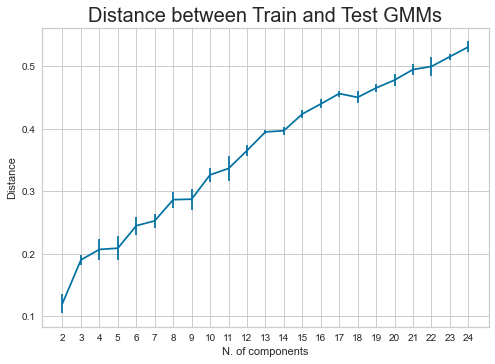

In [41]:
generate_distance_bw_gmms_plots(X_tsvd, 25)

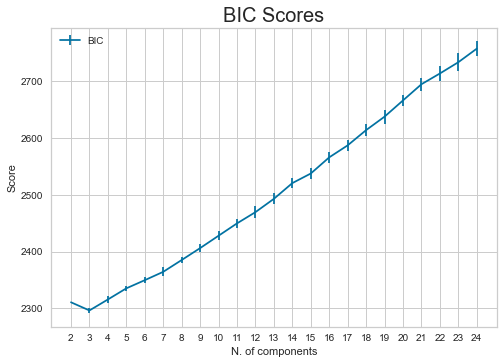

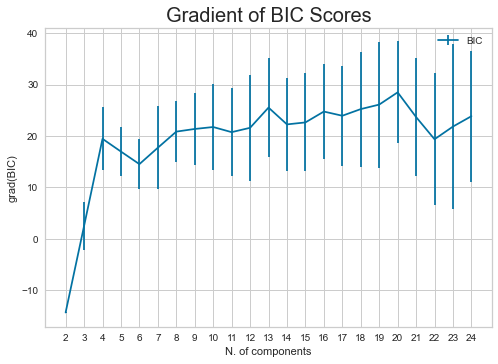

<Figure size 576x396 with 0 Axes>

In [42]:
generate_bic_plot(X_tsvd, 25)

In [43]:
pca = PCA(n_components= 2).fit(X)
X_pca = pca.transform(X)

start = time.time()
gmm=GaussianMixture(8).fit(X_pca)
train_time = time.time() - start
print("Train time: " + str(train_time))

start = time.time()
gmm.predict(X_pca)
query_time = time.time() - start
print("Query time: " + str(query_time))


Train time: 0.028053998947143555
Query time: 0.0009789466857910156
